# **LAB10** #
Monte Carlo – 21 Blackjack

## **1.** Use el código del algoritmo de Montecarlo desde [Github](https://github.com/gjhernandezp/algorithms/tree/master/Montercarlo) ##

Calcule la probabilidad de obtener 21, el promedio de numero de cartas necesarias para completar 21 e imprima la distribucion experimentar de cartas que necesita para completar 21 tomando cartas secuencialmente de un maso de cartas españolas (de 48 cartas) mezclado y de un maso de poker (de 52 cartas) mezclado. Use una simulacion de montecarlo con 10 millones de simulaciones.

### Importar las librerias necesarias ###

In [1]:
import numpy as np
import random as ra
import matplotlib.pyplot as plt

### Funciones para graficar los resultados ###

In [2]:
def graficar_hist(datos, nbins): #función para hacer un histograma, trae como atributos los datos a graficar y el color que tendrá el gráfico
  plt.hist(datos, bins=nbins) #bins se refiere a la distribución de las barras en el histograma, para dejarlo en modo automático de pone 'auto' aunque el valor más aproximado fue 15
  plt.show()

In [3]:
def graficar_pie(num_cartas, num_intentos):
  num_cartas= np.array(num_cartas) # se transforma el arreglo en un array de numpy para poder hacer la operación unique
  indices, valores = np.unique(num_cartas, return_counts=True) #guarda los índices y valores del arreglo al ordenarlo por tipo de dato y su frecuencia
  plt.pie(valores, autopct='%1.2f', startangle=90) #autopct hace que se muestre el dato porcentual en la gráfica
  plt.legend(indices, loc='best') #muestra la leyenda en el lugar adecuado
  plt.axis('equal') #posiciona la leyenda en un lugar adecuado
  plt.show() 
  for i in range(len(indices)):
    print('La probabilidad de obtener 21 al sacar %d cartas es del: %f'%(indices[i],(valores[i]/num_intentos)*100)+" %") #muestra la probabilidad de cada número de cartas

In [4]:
def mostrar_datos(simulacion, n):
  num_cartas = simulacion[0]
  num_intentos = simulacion[1]
  average = sum(num_cartas)
  print('De las %d de veces juagadas, se obtuvo %d veces una 21'%(n, num_intentos))
  print('El promedio de número de cartas necesarias para llegar a 21 fue de: ' , round(average/num_intentos))
  print('El minimo número de cartas necesarias para obtener 21 fue de %d, mientras que el máximo número de cartas fue de %d'%(min(num_cartas), max(num_cartas)))
  print("La probabilidad de obtener 21 es del: ", ((num_intentos/n) *100), '%')

### **a)** Baraja Española ##


La baraja española está compuesta de 4 palos de 12 cartas. En donde la sota(J) toma el valor de 10, el caballo 11 y el rey 12, de la siguiente manera
[1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12].

De modo entonces que la función para jugar una 21 con una baraja española es la siguiente:

In [5]:
def ventiuna(n, baraja, cartas_en_mano):
  num_intentos = 0
  num_cartas = []
  for i in range(n):
    cartas_bar = baraja.copy() 
    if (cartas_en_mano != 0):
      cartas_es = cartas_en_mano.copy()
      num_cartas_para_21 = len(cartas_es)
    else:
      cartas_es = []
      num_cartas_para_21 = 0
    while (sum(cartas_es) < 21): 
      carta = ra.choice(cartas_bar)
      cartas_es.append(carta) 
      cartas_bar.remove(carta) 
      num_cartas_para_21 += 1 
    if (sum(cartas_es) == 21): 
      num_intentos += 1 
      num_cartas.append(num_cartas_para_21) 
  return (num_cartas, num_intentos)

El número de simulaciones requeridas por el ejercicio es de 10 millones 

In [6]:
n = 10000000

Creamos la composicion de la baraja española y ejecutamos la simulación e imprimimos un preeliminar del resultado

In [7]:
#Baraja Epañola
baraja_espanola=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#Simulación
simulacion_esp = ventiuna(n, baraja_espanola, 0)
mostrar_datos(simulacion_esp, n)

De las 10000000 de veces juagadas, se obtuvo 1576784 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  3
El minimo número de cartas necesarias para obtener 21 fue de 2, mientras que el máximo número de cartas fue de 9
La probabilidad de obtener 21 es del:  15.76784 %


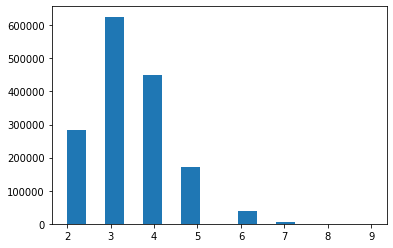

In [8]:
graficar_hist(simulacion_esp[0], 16)

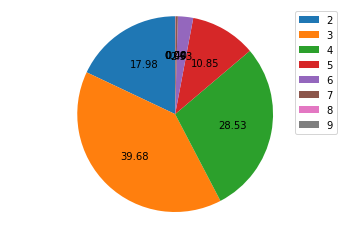

La probabilidad de obtener 21 al sacar 2 cartas es del: 17.978683 %
La probabilidad de obtener 21 al sacar 3 cartas es del: 39.681529 %
La probabilidad de obtener 21 al sacar 4 cartas es del: 28.525277 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 10.848157 %
La probabilidad de obtener 21 al sacar 6 cartas es del: 2.531799 %
La probabilidad de obtener 21 al sacar 7 cartas es del: 0.396123 %
La probabilidad de obtener 21 al sacar 8 cartas es del: 0.036340 %
La probabilidad de obtener 21 al sacar 9 cartas es del: 0.002093 %


In [9]:
graficar_pie(simulacion_esp[0], simulacion_esp[1])

### **b)** Baraja de Poker ##

La baraja de poker se compone por 4 palos de 13 cartas: 9 con valor numerico (2-10), y 3 figuras: As (valor 1 o 11), J o principe (11), Q o reina (12) y K o rey(13). Para este caso no se tendrá en cuenta los joker de la siguiente manera:
[1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

Podríamos usar la misma funcion de 21 de la baraja española, sin embargo, en la baraja de Poker el as (A) se comporta de dos maneras distintas tomando un valor de 1 o de 11 a conveniencia, por tanto hay que realizar ese ajuste en nuestra funcion de simulacion para la 21:

In [10]:
def veintiun_poker(n, poker):
  num_cartas=[]
  num_intentos=0
  for i in range(n):
    cartas_bar=poker.copy()
    cartas_es=[] #cartas en mano
    ases=[] #ases en mano, encaso de obtener varias aes, que tenian el valor de 11 deben ser convertidas a 1
    num_c=0
    while (sum(cartas_es)<21):
      carta=ra.choice(cartas_bar)
      if (carta =='A'): 
        if (sum(cartas_es)+11<21): #caso en el cual el valor máximo de A =11 no excede la 21
          ases.append('A')
          cartas_es.append(11)
        elif (sum(cartas_es)+1 <21): #caso de que a valga 1
          cartas_es.append(1)
        else:
          while (len(ases)>0 and sum(cartas_es)>21): #en caso de tener varias aes en la carta, se minimizará el valor hasta quitar el exceso de 21 o no queden Aes disponibles para cambiar
            ases.remove('A')
            cartas_es.remove(11)
            cartas_es.append(1)
      else:
        cartas_es.append(carta)
      cartas_bar.remove(carta)
      num_c+=1
    if (sum(cartas_es) == 21):
      num_intentos+=1
      num_cartas.append(num_c)
  return (num_cartas, num_intentos)

El numero de simulaciones es el mismo asi que la variable n no la modificamos siendo ya asiganada en 10 millones.

Creamos la composicion de la baraja de poker y ejecutamos la simulación e imprimimos un preeliminar del resultado:

In [11]:
baraja_poker = ['A',2,3,4,5,6,7,8,9,10,11,12,13] #el as se guarda como un string, más adelante se explica el porqué
simulacion_pkr = veintiun_poker(n, baraja_poker)
mostrar_datos(simulacion_pkr, n)

De las 10000000 de veces juagadas, se obtuvo 1309854 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  3
El minimo número de cartas necesarias para obtener 21 fue de 2, mientras que el máximo número de cartas fue de 6
La probabilidad de obtener 21 es del:  13.09854 %


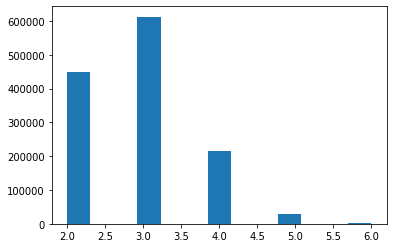

In [12]:
graficar_hist(simulacion_pkr[0],13)

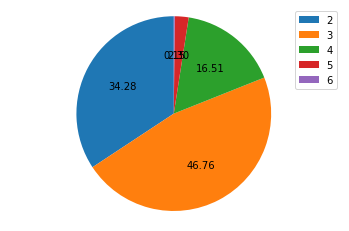

La probabilidad de obtener 21 al sacar 2 cartas es del: 34.278859 %
La probabilidad de obtener 21 al sacar 3 cartas es del: 46.758799 %
La probabilidad de obtener 21 al sacar 4 cartas es del: 16.510466 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 2.299569 %
La probabilidad de obtener 21 al sacar 6 cartas es del: 0.152307 %


In [13]:
graficar_pie(simulacion_pkr[0], simulacion_pkr[1])

## **2.** Calcule la probabilidad con las siguientes distribuciones:##

**a)** Baraja española [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

El numero de simulaciones es de 10 millones

In [14]:
n = 10000000

Creamos la baraja con la distribución requerida, ejecutamos la simulación e imprimimos un resumen de los resultados:

In [15]:
#Baraja Española
cartas_espanola = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] #arreglo que representa la baraja española
#Simulación
simulacion_esp = ventiuna(n, cartas_espanola, 0)
mostrar_datos(simulacion_esp, n)

De las 10000000 de veces juagadas, se obtuvo 1495200 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El minimo número de cartas necesarias para obtener 21 fue de 3, mientras que el máximo número de cartas fue de 10
La probabilidad de obtener 21 es del:  14.951999999999998 %


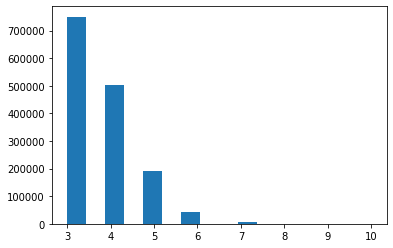

In [16]:
graficar_hist(simulacion_esp[0], 16)

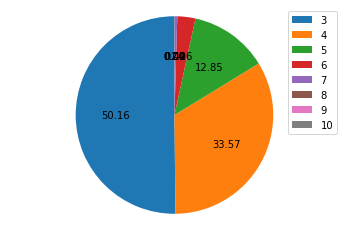

La probabilidad de obtener 21 al sacar 3 cartas es del: 50.161584 %
La probabilidad de obtener 21 al sacar 4 cartas es del: 33.570492 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 12.852394 %
La probabilidad de obtener 21 al sacar 6 cartas es del: 2.957196 %
La probabilidad de obtener 21 al sacar 7 cartas es del: 0.415931 %
La probabilidad de obtener 21 al sacar 8 cartas es del: 0.039995 %
La probabilidad de obtener 21 al sacar 9 cartas es del: 0.002341 %
La probabilidad de obtener 21 al sacar 10 cartas es del: 0.000067 %


In [17]:
graficar_pie(simulacion_esp[0], simulacion_esp[1])

**b)** Baraja de Poker [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

Creamos la baraja con la distribución requerida, ejecutamos la simulación e imprimimos un resumen de los resultados:

In [18]:
baraja_poker = ['A',2,3,4,5,6,7,8,9,10,10,10,10,'A',2,3,4,5,6,7,8,9,10,10,10,10,'A',2,3,4,5,6,7,8,9,10,10,10,10,'A',2,3,4,5,6,7,8,9,10,10,10,10]
simulacion_pkr = veintiun_poker(n, baraja_poker)
mostrar_datos(simulacion_pkr, n)

De las 10000000 de veces juagadas, se obtuvo 1351600 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  3
El minimo número de cartas necesarias para obtener 21 fue de 2, mientras que el máximo número de cartas fue de 9
La probabilidad de obtener 21 es del:  13.516 %


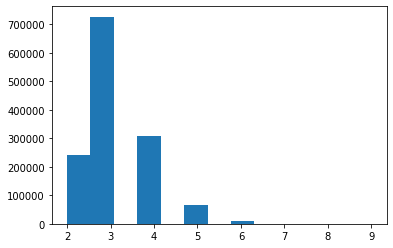

In [19]:
graficar_hist(simulacion_pkr[0],13)

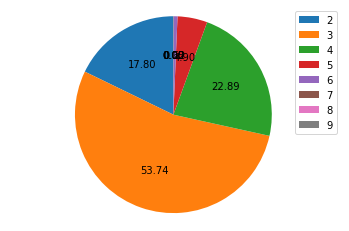

La probabilidad de obtener 21 al sacar 2 cartas es del: 17.803418 %
La probabilidad de obtener 21 al sacar 3 cartas es del: 53.742823 %
La probabilidad de obtener 21 al sacar 4 cartas es del: 22.885469 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 4.896123 %
La probabilidad de obtener 21 al sacar 6 cartas es del: 0.619414 %
La probabilidad de obtener 21 al sacar 7 cartas es del: 0.050385 %
La probabilidad de obtener 21 al sacar 8 cartas es del: 0.002294 %
La probabilidad de obtener 21 al sacar 9 cartas es del: 0.000074 %


In [20]:
graficar_pie(simulacion_pkr[0], simulacion_pkr[1])

# 3. Probabilidad con $\frac{n}{2}$ cartas

Calcule la probabilidad de obtener una 21, con la baraja española y de poker, asumiendo que se está a la mitad de juego, se tiene la mitad de cartas de la baraja  y el jugador tiene las cartas  [7, 7, 5] . Usted seleccionará un carta de la baraja puesta arbitrariamente con la restricción e que debe tener máximo dos $7_s$ y tres $5_s$. Grafique la distribucón experimental del npumero de cartas requeridas para completar 21 en 10000 simulaciones de juego

**a)** Baraja española

In [21]:
#Numero de simulaciones
n = 10000000

#Creacion Baraja
baraja_med = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

#Simulacion con la mano dada
simulacion= ventiuna(n, baraja_med, [7,7,5])
mostrar_datos(simulacion, n)


De las 10000000 de veces juagadas, se obtuvo 869296 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El minimo número de cartas necesarias para obtener 21 fue de 4, mientras que el máximo número de cartas fue de 5
La probabilidad de obtener 21 es del:  8.69296 %


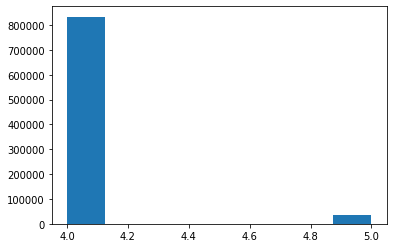

In [22]:
graficar_hist(simulacion[0], 8)

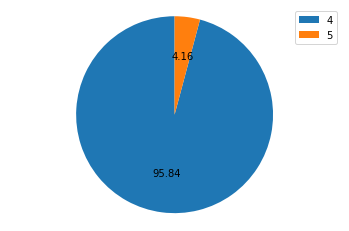

La probabilidad de obtener 21 al sacar 4 cartas es del: 95.841463 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 4.158537 %


In [23]:
graficar_pie(simulacion[0], simulacion[1])

**b)** Baraja de Poker

In [24]:
#Creacion de baraja
bar_med_pok=[1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

#Simulacion de juego con la mano dada
simulacion= ventiuna(n, bar_med_pok, [7,7,5])
mostrar_datos(simulacion, n)

De las 10000000 de veces juagadas, se obtuvo 800970 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El minimo número de cartas necesarias para obtener 21 fue de 4, mientras que el máximo número de cartas fue de 5
La probabilidad de obtener 21 es del:  8.0097 %


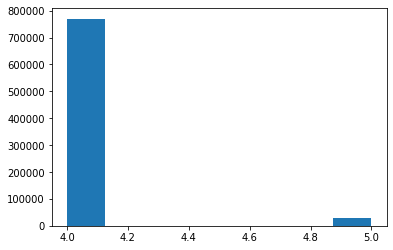

In [25]:
graficar_hist(simulacion[0], 8)

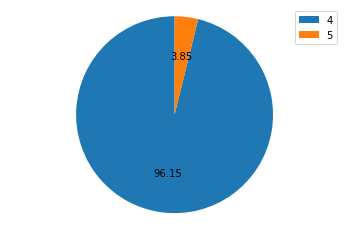

La probabilidad de obtener 21 al sacar 4 cartas es del: 96.151666 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 3.848334 %


In [26]:
graficar_pie(simulacion[0], simulacion[1])

#4. Analiticamente 

*  El hot deck se define como el arreglo con **mayor** probabilidad de sacar 21. En este caso se toma como [1, 1, 1, 1, 2, 2, 2, 2, n1, n2, n3, n4] 
*  El cold deck se define como el arreglo con **menor** probabilidad de sacar 21. En este caso se toma como [n1, n2, n3, n3, n4, n6, n7, n8, n9, n10, n11, n12] 
* Estos arreglos se deben a que cualquier carta diferente a 1 o 2 excederá 21 teniendo una suma previa de 19.
*  Donde $ni$ son números cuales quiera.

 **Hot Deck Probabilidad.** 

 
 **Analíticamente**
Dado [7,7,5] la probabilidad de obtener un 2, es:

*   Una carta: 2
*   Dos cartas: 1, 1
*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)}$ = ${4}\choose{2}$ / ${12}\choose{2} $ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} =  \frac{4}{12}  $ 

$P_{(2)}= \frac{4}{12} + \frac{6}{66} = 0.424242$ 
* Verificando con Monte Carlo:


In [27]:
# Número de simulaciones
n = 10000000

#Baraja
#arreglo que representa la baraja española
cartas_espanola=[1, 2, 3] * 4 

#Simulación
cartas_en_mano = [7, 7 , 5]
simulacion = ventiuna(n, cartas_espanola, cartas_en_mano)
mostrar_datos(simulacion, n)

De las 10000000 de veces juagadas, se obtuvo 4241725 veces una 21
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El minimo número de cartas necesarias para obtener 21 fue de 4, mientras que el máximo número de cartas fue de 5
La probabilidad de obtener 21 es del:  42.41725 %


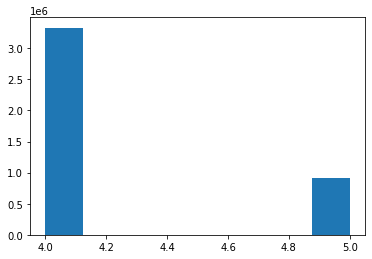

In [28]:
graficar_hist(simulacion[0], 8)

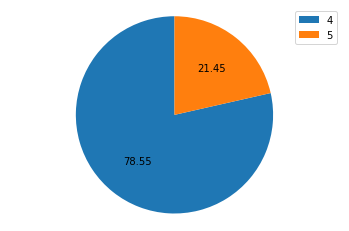

La probabilidad de obtener 21 al sacar 4 cartas es del: 78.550377 %
La probabilidad de obtener 21 al sacar 5 cartas es del: 21.449623 %


In [29]:
graficar_pie(simulacion[0], simulacion[1])

In [30]:
#Baraja
cartas_espanola = [10, 10, 10] * 4 #arreglo que representa la baraja española
#Simulación
cartas_en_mano = [7, 7 , 5]
simulacion = ventiuna(n, cartas_espanola, cartas_en_mano)
print('De las %d reparticiones, se obtuvo %d veintiunas'%(n, simulacion[1]))
print("Probabilidad de obtener 21 es del: ", ((simulacion[1]/n) *100), '%')

De las 10000000 reparticiones, se obtuvo 0 veintiunas
Probabilidad de obtener 21 es del:  0.0 %


**Cold Deck Probabilidad - SPANISH & POKER**

**Analiticamente.**

*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad total:
$ P_{(2)} = \frac{0}{12}$ 


In [31]:
#Baraja
cartas_espanola = [10, 10, 10] * 4 #arreglo que representa la baraja española
#Simulación
cartas_en_mano = [7, 7 , 5]
simulacion = ventiuna(n, cartas_espanola, cartas_en_mano)
print('De las %d reparticiones, se obtuvo %d veintiunas'%(n, simulacion[1]))
print("Probabilidad de obtener 21 es del: ", ((simulacion[1]/n) *100), '%')

De las 10000000 reparticiones, se obtuvo 0 veintiunas
Probabilidad de obtener 21 es del:  0.0 %


# 5. Ben va a las Vegas


**1.**   Juega cada fin de semana: 3 días

**2.**   Horas: 10

**3.**   Cada juego: 3 minutos. Por tanto nos da: 600 juegos

**4.**  Apuesta 1000 en hot decks

**5.**   Apuesta 10 en cold decks

**6.**   1 de 10 veces el tiene hot deck.

**7.**   9 de 10 veces el tiene cold deck.


**Analisis**

1800 minutos / 3 minutos por juego = 600 juegos

In [32]:
def bet(n, hot_deck, cold_deck, cartas_en_mano): # trae la baraja, el numero de cartas e intentos exitosos para cualquier tipo de baraja. 
  num_intentos = 0 # Guarda el número de éxitos. Es decir cada vez que hay 21
  num_cartas = [] # Guarda la distribución del número de cartas para llegar a 21
  cartas_en_juego = cartas_en_mano.copy() #Se manipula solo la copia de cartas en mano, de manera que no se pierda la información de la original

  #Estas variables son para calcular las probabilidades de hot deck y cold deck independiemtemente
  num_hotdeck = 0 # Número de éxitos cuando es hot deck
  num_colddeck = 0 #N úmero de éxito cuando es cold deck
  ensayos_hotdeck = 0 # De los n * 600 ensayos totales, cuenta solo los ensayos para hot deck
  ensayos_colddeck = 0 # De los n * 600 ensayos totales, cuenta solo los ensayos para cold deck


  for i in range(n): #Simulación de 10000 veces
    probabilidad_deck = 0 # Cuenta cada cuanto debe haber un hot deck o un cold deck
    for j in range(600): #Este loop representa un fin de semana, en los que hace 600 juegos
      probabilidad_deck = ra.choice(range(11))  #Probabilidades de sacar un hot deck o un cold deck en cada juego. Se cuenta en tandas de 10
      if probabilidad_deck == 1:
        cartas_bar = hot_deck.copy()
        cartas_en_juego = cartas_en_mano.copy() #Si hay hot deck, hay cartas en mano
        ensayos_hotdeck += 1
      else:
        cartas_bar = cold_deck.copy() #Si es la primera vez, es cold deck, si es la segunda hasta la décima vez es cold deck.
        cartas_en_juego = 0 #Si hay cold deck no hay cartas en mano
        ensayos_colddeck += 1

      #Desde aquí comienza el algoritmo principal de montecarlo para calcular la probabilidad TOTAL incluidos sea que salgan cold decks o hot decks en cada iteración.
      if (cartas_en_juego != 0): #se almacenan las cartas previamente en mano
        cartas_es = cartas_en_juego.copy()
        num_cartas_para_21 = len(cartas_es)
      else: # Si se tiene una mano vacia, se debe llevar el tercer atributo el valor de 0 y entra a este else
        cartas_es = []
        num_cartas_para_21 = 0 # Número de cartas para llegar a 21
      #Cartas_es: Cartas escogidas.
      while (sum(cartas_es) < 21): # Mientras la suma de cartas escogidas no sea igual o mayor a 21
        carta = ra.choice(cartas_bar) # 1. Se escoge una carta al azar
        cartas_es.append(carta) # 2. Guarda la carta escogida en la lista respectiva.
        cartas_bar.remove(carta) # 3. Se elimina del deck
        num_cartas_para_21 += 1 # 4. Se cuenta esta carta.
      if (sum(cartas_es) == 21): 
        num_intentos += 1 # Se cuenta un éxito en la probabilidad
        num_cartas.append(num_cartas_para_21) # Se guarda el número de cartas que se tomó para llegar a esa 21.

        if probabilidad_deck == 1: #Acumular los éxitos de manera independiente para hot deck y cold deck
          num_hotdeck += 1
        else:
          num_colddeck += 1

  return (num_cartas, num_intentos, num_hotdeck/ensayos_hotdeck, num_colddeck/ensayos_colddeck) 
  # Devuelve: (La lista del número de cartas para llegar a 21 total; El número de éxitos total, Probabilidades ya caluladas hot deck; cold deck)

**Hot deck** & **Cold deck**

In [ ]:
#Datos
n = 10000
cartas_en_mano = [7, 7, 5]
hotdeck = [1, 2, 3] * 4 # Hot deck
colddeck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10] * 4 #Complete deck
simulacion = bet(n, hotdeck, colddeck, cartas_en_mano)
num_cartas = simulacion[0]
num_intentos = simulacion[1]
average = sum(num_cartas)
print('De las %d reparticiones, se obtuvo %d veintiunas'%(n, num_intentos))
print('El promedio de número de cartas necesarias para llegar a 21 fue de: ' ,round(average/ num_intentos ) )
print('El menor número de cartas necesarias para obtener 21 fue de %d cartas mientras que el máximo número de cartas fueron %d'%(min(num_cartas), max(num_cartas)))
print("Probabilidad de obtener 21 es del: ", ((num_intentos / (n * 600) ) *100), '%')
print("Probabilidad de obtener 21 de Hot Deck : ", (simulacion[2] * 100), '%')
print("Probabilidad de obtener 21 de Cold Deck : ", (simulacion[3] * 100), '%')

**Resultados en un fin de semana** 

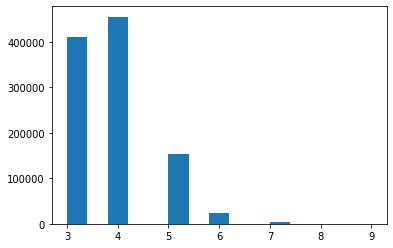

In [ ]:
graficar_hist(simulacion[0],  15)